Certification Authorität gibt Zertifikate aus 
=> hat einen Private+Public Key generiert
=> Certificate Signing Request...
+

Vorbedingungen auf dem Client:

* Trusted CAs müssen ein

In [1]:
### DH(M)E
### source: https://www.geeksforgeeks.org/implementation-diffie-hellman-algorithm/
from random import randint

if __name__ == '__main__':

	# Both the persons will be agreed upon the
	# public keys G and P
	# A prime number P is taken
	P = 23
	
	# A primitive root for P, G is taken
	G = 9
	
	
	print('The Value of P is :%d'%(P))
	print('The Value of G is :%d'%(G))
	
	# Alice will choose the private key a
	a = 4
	print('The Private Key a for Alice is :%d'%(a))
	
	# gets the generated key
	x = int(pow(G,a,P))
	
	# Bob will choose the private key b
	b = 3
	print('The Private Key b for Bob is :%d'%(b))
	
	# gets the generated key
	y = int(pow(G,b,P))
	
	
	# Secret key for Alice
	ka = int(pow(y,a,P))
	
	# Secret key for Bob
	kb = int(pow(x,b,P))
	
	print('Secret key for the Alice is : %d'%(ka))
	print('Secret Key for the Bob is : %d'%(kb))


The Value of P is :23
The Value of G is :9
The Private Key a for Alice is :4
The Private Key b for Bob is :3
Secret key for the Alice is : 9
Secret Key for the Bob is : 9


In [1]:
### ECDHE
### source: https://cryptobook.nakov.com/asymmetric-key-ciphers/ecdh-key-exchange-examples
from tinyec import registry
import secrets

def compress(pubKey):
    return hex(pubKey.x) + hex(pubKey.y % 2)[2:]

curve = registry.get_curve('brainpoolP256r1')

alicePrivKey = secrets.randbelow(curve.field.n)
alicePubKey = alicePrivKey * curve.g
print("Alice public key:", compress(alicePubKey))

bobPrivKey = secrets.randbelow(curve.field.n)
bobPubKey = bobPrivKey * curve.g
print("Bob public key:", compress(bobPubKey))

print("Now exchange the public keys (e.g. through Internet)")

aliceSharedKey = alicePrivKey * bobPubKey
print("Alice shared key:", compress(aliceSharedKey))

bobSharedKey = bobPrivKey * alicePubKey
print("Bob shared key:", compress(bobSharedKey))

print("Equal shared keys:", aliceSharedKey == bobSharedKey)

Alice public key: 0x6822e8a8e46749d4d6a16bc7cc5c49ca9a0113d949a970ecc8d21f199fb66c511
Bob public key: 0x3201fe4fdae313bb9fb8d340a77ccdae8093cefed689e463bda24f8ad127a27d1
Now exchange the public keys (e.g. through Internet)
Alice shared key: 0xa5dd2125885d4062cb6e760d4f548ffbc8667f0fa6ae171f0c442c03a4dadfa80
Bob shared key: 0xa5dd2125885d4062cb6e760d4f548ffbc8667f0fa6ae171f0c442c03a4dadfa80
Equal shared keys: True


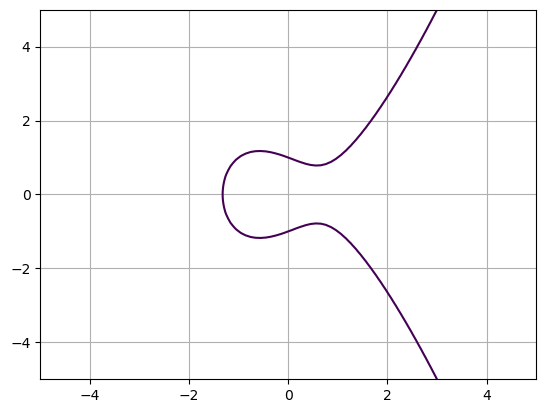

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    a = -1
    b = 1

    y, x = np.ogrid[-5:5:100j, -5:5:100j]
    plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()